# Unsupervised Learning
> In this tutorial, we are going to have a look at how we can use unsupervised learning when we have unlabeled data.

- toc: true
- badges: true
- comments: true
- categories: [jupyter]
- image: images/clustering_.PNG





Unsupervised Learning is the use of algortihms to extract and identify patterns and information from the data which is not labelled. Difference of unsupervised learning in comparison to supervised learning is that we do not tell the algorithm which input data results in which target/output but we provide the algorithm the data as a whole and allow the algorithm to identify patterns in the data on its own.

# Clustering

Clustering is the most often used technique for unsupervised learning. Clustering groups the data points which are similar to each other in terms of the features of the data. 

![Clustering](https://drive.google.com/uc?export=view&id=1lUk3fBO0O-heKHmmi9xjTZcIZ_lCn6ux)

There are many clustering types available; centroid model, connectivity model, distribution model, density model etc. We will be focusing on the mostly used three categories:


*   **Centroid model:** This type of clustering is an iterative process where the similarity of the data points are based on the distance to the centroid of the clusters in one or multidimensional space. One very popular model which falls under this category is the K-means clustering.

*   **Connectivity model:** In this types of model the data points are considered more similar to nearby points in comparison than those farther away. These models can be either agglomerative or divisive. In the agglomerative approach, all data points are grouped into many clusters and then these clusters are merged into bigger ones with respect to the distances between them. In the divisive approach, all the data points are grouped into one cluster and then divided into smaller clusters with increasing distance. Hierarchical clustering is a well known and popular example for this model. This model does not handle large datasets very well.

*   **Density model:** This type of models cluster the data points in one or multidimensional space based on determining areas of higher density (high number of data points in a small space) compared to the rest of the data. One often used example is DBSCAN.




## Distance Measures

Until now we have discussed how clustering groups similar data points together. This is done by using different types of distance measures to determine if the data points are similar. Smaller distance between data points means more similar data points. Which distance measure to use depends very much on the type of data and problem that we are dealing with and it is an important factor. THe most used distance measures are:


*   Eucledian distance
*   Manhattan distance

Where Eucledian distance is usually the default distance measure for most of the clustering models. We have already seen how these distance measures work in k Nearest Neighbors section. Therefore, we will not go into detail again. However, we can calculate the Eucledian distances for a simple example so that the concept is clear. Below is an example dataset containing three samples and their three features (F1, F2, F3):

|          | F1 | F2 | F3 |
|----------|----|----|----|
| Sample 1 | 0  | 1  | 1  |
| Sample 2 | 2  | 4  | 0  |
| Sample 3 | 1  | 0  | 2  |

Remembering the formula for Eucledian distance between two points, where x_i represents the feature of x for every sample i, and y_i represents the feature of y for every sample i:

$$ \sqrt{\sum\limits_{i=1}^{l}({x_i-y_i})^2} $$


$$ d(sample_1, sample_2) = \sqrt{\sum\limits_{i=1}^{3}({\Delta_{sample_1,sample_2}F_i})^2} $$

$$ d(sample_1, sample_2) = \sqrt{(0-2)^2 + (1-4)^2 + (1-0)^2} = \sqrt{14} $$
$$ d(sample_1, sample_3) = \sqrt{(0-1)^2 + (1-0)^2 + (1-2)^2} = \sqrt{3} $$
$$ d(sample_2, sample_3) = \sqrt{(2-1)^2 + (4-0)^2 + (0-2)^2} = \sqrt{21} $$

The resulting distance matrix becomes:

|          | Sample 1 | Sample 2 | Sample 3 |
|----------|----------|----------|----------|
| Sample 1 |    $$0$$ |$$\sqrt{14}$$| $$\sqrt{3}$$ |
| Sample 2 |$$\sqrt{14}$$|$$0$$     | $$\sqrt{21}$$|
| Sample 3 | $$\sqrt{3}$$|$$\sqrt{21}$$| $$0$$     |

Have you realised that diagonal is always zero and we ended up with a symmetric matrix? Well that is due to the way we calculate the distance with the Eucledian measure. The distance of a point to itself is always zero (diagonal) and the distance between sample 1 to sample 2 is same as sample 2 to sample 1 (symmetric) which makes very much sense...

In addition there are also correlation based distance measures such as Pearson correlation distance, Eisen cosine correlation distance, Spearman correlation distance and Kendall correlation distance. As the name already expresses, these measures consider two data points to be similar if their features are highly correlated. That means two data points having highly correlated features can be clustered together even if their eucledian distance is large. We will not go into detail for correlation based distances but keep in mind that Pearson's correlation is sensitive to outlier data. With datasets containing outliers a better option might be Spearman's correlation.

## Connectivity model: Hierarchical Clustering

As the name suggests, hierarchical clustering creates a hierarchy between the clusters. It does this by first assigning a cluster to every data point (for a dataset with size n, we get n clusters) and then the two nearest(most similar) clusters are merged together to form a new larger cluster. This merging of clusters continues iteratively until there is one whole cluster left. This way, the algorithm builds a hierarchy of clusters, thus hierarchical clustering.

There are two main types of hierarchical clustering:


*   Agglomerative hierarchical clustering
*   Divisive hierarchical clustering

### Agglomerative Hierarchical Clustering

In Agglomerative hierarchical clustering the clustering starts with a cluster for every data point. Then, the nearest (most similar) pair of clusters are merged together. This merging process is done iteratively until there is only one big cluster left.

![Agglomerative Hierarchical Clustering](https://drive.google.com/uc?export=view&id=1E8b_I2NjxzChNcCVoWzEUA2gN-DzolGb)

### Divisive Hierarchical Clustering

Divisive Hierarchical Clustering works the other way around. It starts with one cluster and assigns all the data points to that cluster. Afterwards, we split the farthest points in the cluster to seperate clusters. This splitting process is done iteratively until every cluster has one data point only.

![Divisive Hierarchical Clustering](https://drive.google.com/uc?export=view&id=1Sn5wdrO7QKTve_clV64M8TlgU8eJ7hcJ)

Let's perform hierarchical clustering on iris dataset from sklearn:

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()

Checking the features in our dataset, we can see that we have four features for each flower: sepal length, sepal width, petal length, petal width

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Checking the target names, the flowers are classified into three different classes: setosa, versicolor, virginica. Don't get confused, we will not use the target names since we are dealing which clustering(unsupervised learning) here. This is just to give us a better understand of the dataset...

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data = iris_data.data

### Dendrograms

Dendrograms are diagrams which are very helpful in visualising the hierarchical clustering structure. We can create a dendrogram to visualize the hierarchical clustering structure for the iris dataset:


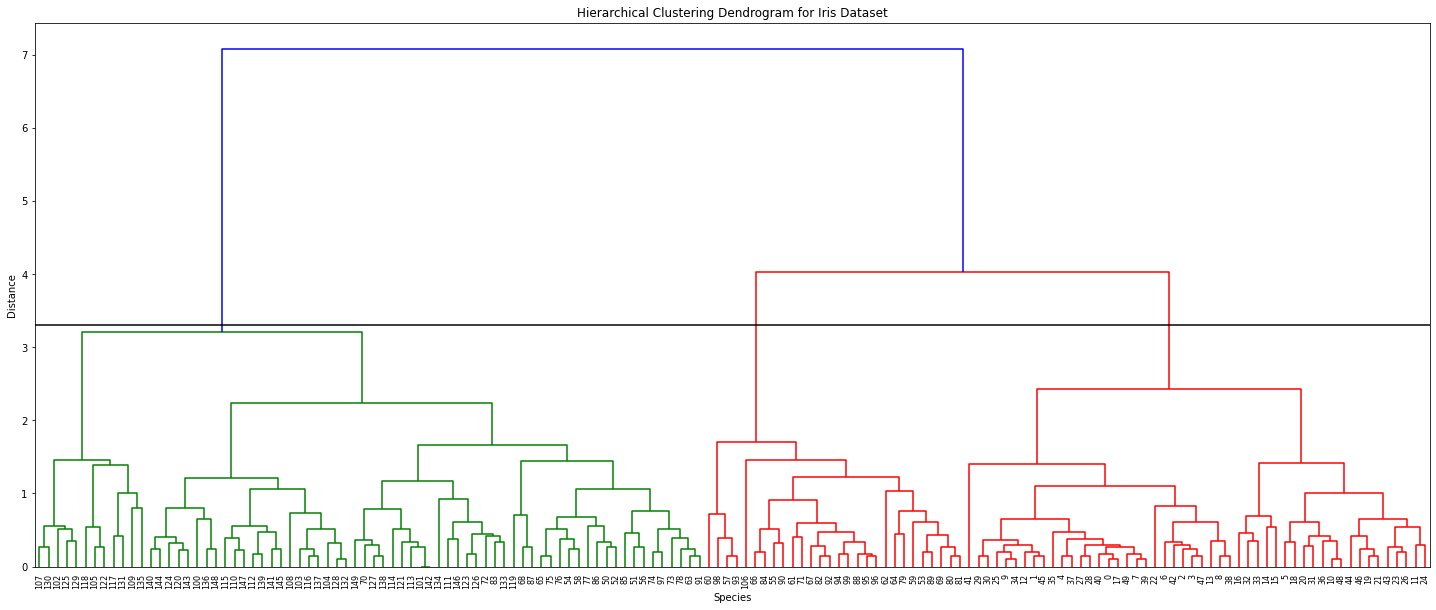

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
# generate the linkage matrix
Z = linkage(data, method='complete') #method as 'complete' is also known by the Farthest Point Algorithm


plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram for Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    Z,
    #truncate_mode='lastp',  # show only the last p merged clusters
    #p=150,                  #
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
max_d = 3.3                # max_d as in max_distance
plt.axhline(y=max_d, c='k')
plt.show()

Flatten the hierarchical cluster that we have obtained from linkage using the fcluster (flat cluster) with our number of cluster selection equals to three. We can assign the cluster as a new column to the dataframe. But before that we need to convert our data to a dataframe...

In [ ]:
clusters = fcluster(Z,3, criterion='maxclust')
print(clusters)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


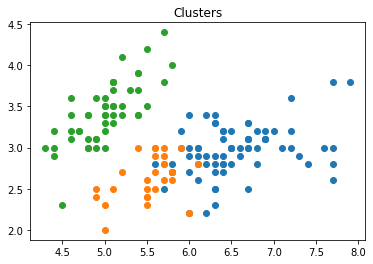

In [ ]:
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label = 'Type 1')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], label = 'Type 2')
plt.scatter(data[clusters == 3, 0], data[clusters == 3, 1], label = 'Type 3')
plt.title('Clusters')
plt.show()

Now we know that three clusters would be a good decision for clustering the iris data. We can use the AgglomerativeClustering model with 3 clusters and compare the results to the target data we have. Since we use the same linkage method, we expect to get the same clustering results as the dendrogram

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
classifier = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete') 
clusters = classifier.fit_predict(data)

Using the clusters we have obtained from AgglomerativeClustering model, we can plot the first two features as a scatter plot and compare it to the scatter plot of the target data from the dataset.

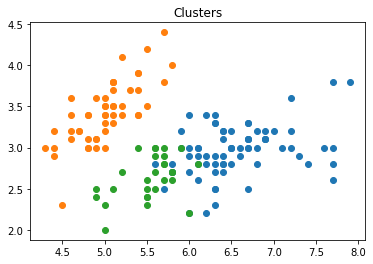

In [ ]:
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], label = 'Type 1')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label = 'Type 2')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], label = 'Type 3')
plt.title('Clusters')
plt.show()

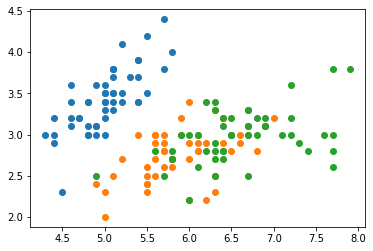

In [ ]:
y=iris_data.target
plt.scatter(data[y == 0, 0], data[y == 0, 1], label = 'Type 1')
plt.scatter(data[y == 1, 0], data[y == 1, 1], label = 'Type 2')
plt.scatter(data[y == 2, 0], data[y == 2, 1], label = 'Type 3')

We have obtained a very similar clustering in comparison to the classification in the data except for a few data points. This way we were able to group similar species together using their features. 

## Centroid Model: K-means Clustering

K-means clustering clustering is an iterative process where the similarity of the data points are based on the distance to the centroid of the clusters in one or multidimensional space. The algorithm partitions the data into K clusters where a data point in only in one cluster. The aim is to collect as similar as possible data points in one cluster while keeping the cluster as farther as possible. Algorithm does this by making sure that the sum of the squared distance between the datapoints and the cluster's centroid is minimum by minimizing the function known as squared error function:

$$ J(v) = \sum\limits_{i=1}^{k} \sum\limits_{j=1}^{c_i}{||x_i-v_j||^2} $$

where:

$ ||x_i-v_j||^2 $= Euclidean distance between two pints x_i and v_j 

$ c_i $ = number of data points in cluster i

$ k $ = number of centroids

To sum up the process of the algorithm:


1.   Initialize K cluster centroids: Select K data points by random sampling without replacement
2.   Calculate the centroid of the clusters:

 $$  v_i = \sum\limits_{j=1}^{k}{\frac{x_j}{c_i}} $$
3.   Calculate the sum of the squared distances between the data points and all cluster centroids
4.   Relocate the data points to the closest centroid
5.   Recalculate the centroid of the clusters which were changed

6.   Continue step 3-5 until no further changes in the clusters occur





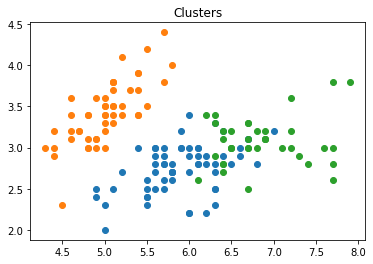

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
clusters = kmeans.fit_predict(data)
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], label = 'Type 1')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label = 'Type 2')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], label = 'Type 3')
plt.title('Clusters')
plt.show()

### Elbow Method: Finding the best K

The elbow method is a good way to find an ideal K value (number of clusters). Unlike hierarchical clustering, this is an important point because we have to define a good number of clusters to obtain good results with K-Means clustering where we need a predefined K value. 

Elbow method works buy plotting the sum of squared distances with respect to the numbers of clusters (K). The ideal K numbers would be where the curve starts to flatten out (where it forms an elbow).

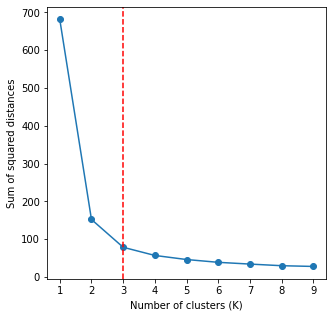

In [ ]:
k_values = list(range(1, 10)) # define the range of K values that we want to examine

sum_sq_dist = []
for k in k_values:
    k_m = KMeans(n_clusters=k)
    k_m.fit(data)
    sum_sq_dist.append(k_m.inertia_) # inertia_: Sum of squared distances of samples to their closest cluster center

# Plot sum squared distances with respect to K
plt.figure(figsize=(5, 5))
plt.plot(k_values, sum_sq_dist, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances')
plt.axvline(x=3, c='r', linestyle='--')

The elbow method also confirms that 3 clusters would be an ideal number. If we did not have a hint about the logical number of clusters from the iris dataset, using the elbow method would be a good idea to determine the ideal number of clusters.

## Density Model: DBSCAN

In this section, we will talk about Density-based Spatial Clustering of Applications with Noise (DBSCAN). We have talked about K-Means clustering in the previous section. While K-Means clustering is easy to apply, it does not deal well with outliers due to the way it constructs the clusters. It assigns all the points to a cluster in which outliers are also assigned to clusters in which they may not belong. This a big problem for anomaly detection because anomalous points will also be assigned to a cluster and they will also pull the centroid of the clusters towards them, making it even harder to identify them as anomalies.

This is where density based clustering run to our help. In comparison to centroid based clustering like K-Means clustering, density based models identify the dense areas of cluster points, making it possible to learn clusters of arbitrary shape and therefore identify outliers/anomalies in the dataset.

Example for spherical or convex shaped clusters where K-means and hierarchical clustering would work well (well seperated clusters are also visibly identifiable).

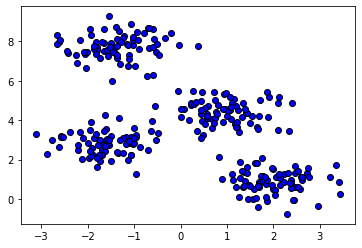

In [ ]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)

plt.plot(X[:,0], X[:,1], 'o', markerfacecolor='b',
             markeredgecolor='k',
             markersize=6)


Example for a dataset with arbitrary shape and a lot of noise:

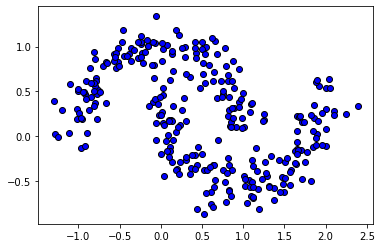

In [ ]:
from sklearn.datasets import make_moons

moons_X, moon_y = make_moons(n_samples = 300, noise= 0.15, random_state=0)
plt.plot(moons_X[:,0], moons_X[:,1], 'o', markerfacecolor='b',
             markeredgecolor='k',
             markersize=6)

### Important Parameters

DBSCAN algorithm works on two important parameters:

**Epsilon (ϵ):** This parameters determines the distance around a data point which defines the neighborhood of that point. If the distance between two points is less than this value, then they will be considered as neighbors. This parameter is important when it comes to determining the outliers. If Epsilon is chosen too small, then most of the data will be considered as outliers. If it is chosen too large, then many clusters will merge together forming a large clusters including majority of the data points. 

How do we decide which Epsilon value is the best? We can use K-distance graph to find the best value.

![Epsilon - Neighborhood](https://drive.google.com/uc?export=view&id=18jMV0adt9Ab7AIDG_4bW3ylAB1yPb0cH)

**Minimum number of samples:** This parameters determines the minimum number of datapoints should be inside the neighborhood defined using epsilon value. This parameter should be chosen larger for larger datasets. Generally this parameter can be determined from the number of dimensions (D) in data. It should be larger or equal to dimensionality of the dataset.

The three types of data points that exist in this model are:

**Core Point:** A data point which has more than the minimum number of samples parameter in its neighborhood.

**Border Point**: A data point which has points less than the minimum number of samples parameter within its neighborhood but it is in the epsilon range (neigborhood) of another core point.

**Noise / Outlier Point:** A data point which is neither a core point or a border point.

In the figure below, we can see that a potential candidate for a core point, can not be a core point when the minimum samples parameter is selected as four. It only has three points (including itself= within its neighborhood and therefore does not meet the threshold requirement. However the point below seems satisfy the requirement with 6 points within its neighborhood.
![Diagram to explain point types](https://drive.google.com/uc?export=view&id=1CM6Yz2eMpzbAuWDyYB2riTEa6ukdGVAV)

DBSCAN model steps:



1.   Select a random data point from the data
2.   Determine the number of points within its neighborhood using epsilon. If it is more than than the minimum samples parameter, assign it as a cluster. If less, than as noise/outlier point
3.   We add the neighborhood as a part of the cluster. This results in neighborhood of each data point in the cluster also adding to the cluster distance. This way the cluster enlarges with new data points as their neighborhood (epsilon) is also added to the cluster until no further data points can be added to the cluster
4.   The steps 2-4 are repeated until all data points have been selected and labeled

[Reference](https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/)

[Reference](https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/)



In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2, min_samples=7).fit(moons_X)
clusters = db.labels_

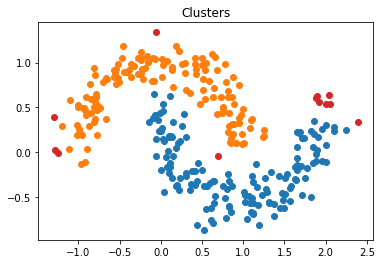

In [ ]:
plt.scatter(moons_X[clusters == 0, 0], moons_X[clusters == 0, 1], label = 'Type 1')
plt.scatter(moons_X[clusters == 1, 0], moons_X[clusters == 1, 1], label = 'Type 2')
plt.scatter(moons_X[clusters == 2, 0], moons_X[clusters == 2, 1], label = 'Type 3')
plt.scatter(moons_X[clusters == -1, 0], moons_X[clusters == -1, 1], label = 'Outlier')
plt.title('Clusters')
plt.show()

We have talked enough about the DBSCAN model and its concept. We can use the DBSCAN model from Sklearn to cluster the iris dataset and compare its performance to other clustering algorithms.

In [ ]:
db = DBSCAN(eps = 0.4, min_samples=4).fit(data) # we can play with the epsion variable and see how choosing a large value creates 
#                                             a single large cluster and choosing a small value, creates small clusters with many outliers
clusters = db.labels_

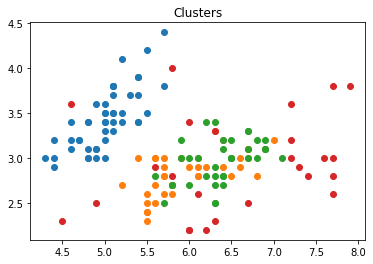

In [ ]:
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], label = 'Type 1')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], label = 'Type 2')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], label = 'Type 3')
plt.scatter(data[clusters == -1, 0], data[clusters == -1, 1], label = 'Outlier')
plt.title('Clusters')
plt.show()

### How to select Epsilon?

We can use the K-distance graph which we previously mentioned to find an ideal epsilon value. K-distance graph shows us the distance between each datapoint and its K nearest neigbors. For this we have to calculate the Nearest Neighbors and their distance using the NearestNeighbors from sklearn. The average distances are then plotted against the number of points used to calculate the distance. The most optimal value as epsilon is the distance where the graph has the highest curvature (at the elbow). Looking at the graph we can easily intrepret that this point signals us the point where the density border of the cluster lies. After this point, the average distance increases greatly with fewer number of points, because they lay farther than the rest of the points (potential outliers).

This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur.

[Reference](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf)

Let's calculate the ideal epsilon for iris dataset. We can use the min samples value that we have used as the value for number of neighbors.

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

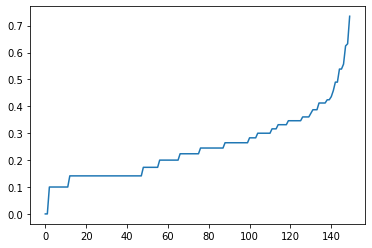

In [ ]:
import numpy as np
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

As seen, the highest curvature is reached at average distance 0.4, which would also the epsilon which we used previously.